In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Đọc dữ liệu về metadata của các sách

In [ ]:
df = pd.read_parquet('metadata_en2.parquet')
df

,title,creator,birthdate,deathdate,publisher,issued,rights,language,subjects,description,Index,download count
1,The Master Spirit,"Magnay, William, Sir",1855,1917,Project Gutenberg,2022-03-25,Public domain in the USA.,en,"[London (England) -- Fiction, Love stories, Ad...",[Reading ease score: 71.3 (7th grade). Fairly ...,67703,57
2,The Family on Wheels,"Oxley, J. Macdonald (James Macdonald)",1855,1907,Project Gutenberg,2017-11-05,Public domain in the USA.,en,"[Orphans -- Juvenile fiction, Siblings -- Juve...",[Reading ease score: 77.9 (7th grade). Fairly ...,55891,43
3,Three Good Giants\nWhose Ancient Deeds are rec...,"Rabelais, François",1835,1901,Project Gutenberg,2019-04-09,Public domain in the USA.,en,"[Fantasy fiction, Conduct of life -- Juvenile ...",[Reading ease score: 76.2 (7th grade). Fairly ...,59235,105
4,Drake's Road Book of the Grand Junction Railwa...,"Drake, James, active 1825",None,None,Project Gutenberg,2013-07-31,Public domain in the USA.,en,[Grand Junction Railway Company (Great Britain...,[Reading ease score: 65.5 (8th & 9th grade). N...,43367,127
5,Facts and Speculations on the Origin and Histo...,"Chatto, William Andrew",1799,1864,Project Gutenberg,2014-05-04,Public domain in the USA.,en,"[Playing cards -- History, GV]",[Reading ease score: 62.7 (8th & 9th grade). N...,45584,158
...,...,...,...,...,...,...,...,...,...,...,...,...
74677,Reform and Politics\r\nPart 2 from The Works o...,"Whittier, John Greenleaf",1807,1892,Project Gutenberg,2005-12-01,Public domain in the USA.,en,"[United States -- Politics and government, PS]",[Reading ease score: 49.7 (College-level). Dif...,9596,None
74678,"The Speedwell Boys and Their Ice Racer; Or, Lo...","Rockwood, Roy",None,None,Project Gutenberg,2015-06-07,Public domain in the USA.,en,"[Iceboating -- Juvenile fiction, PZ]",[Reading ease score: 83.7 (6th grade). Easy to...,49162,None
74680,The Starling: A Scottish Story,"Macleod, Norman",1812,1872,Project Gutenberg,2013-02-12,Public domain in the USA.,en,"[Clergy -- Fiction, Villages -- Fiction, Scotl...",[Reading ease score: 78.4 (7th grade). Fairly ...,41989,None
74682,"Chronicles of England, Scotland and Ireland (2...","Holinshed, Raphael",None,None,Project Gutenberg,2005-09-25,Public domain in the USA.,en,"[Great Britain -- History -- Tudors, 1485-1603...",[Reading ease score: 58.5 (10th to 12th grade)...,16749,None


Dưới đây là thông tin cơ bản của bộ dữ liệu:

In [3]:
print(f"Dataframe's shape: {df.shape}\n")
print(df.info())

Dataframe's shape: (59852, 12)

<class 'pandas.core.frame.DataFrame'>
Index: 59852 entries, 1 to 74683
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           59847 non-null  object
 1   creator         59698 non-null  object
 2   birthdate       49715 non-null  object
 3   deathdate       48613 non-null  object
 4   publisher       59852 non-null  object
 5   issued          59852 non-null  object
 6   rights          59852 non-null  object
 7   language        59852 non-null  object
 8   subjects        59852 non-null  object
 9   description     59852 non-null  object
 10  Index           59852 non-null  object
 11  download count  9945 non-null   object
dtypes: object(12)
memory usage: 5.9+ MB
None


## Tiền xử lý dữ liệu
Dưới đây là khảo sát kiểu dữ liệu và miền giá trị của ba cột `'birthdate'`, `'deathdate'` và `'download count'`:

In [4]:
print("Birthdate's unique values:\n", df['birthdate'].unique())
print("Deathdate's unique values:\n", df['deathdate'].unique())
print("Download Count unique values:\n", df['download count'].unique())

Birthdate's unique values:
 ['1855' '1835' None '1799' '1836' '1873' '1804' '1803' '1837' '1911'
 '1859' '1812' '1865' '1813' '1851' '1849' '1862' '1879' '1846' '1860'
 '1885' '1872' '1822' '1910' '1814' '1876' '1893' '1903' '1882' '1852'
 '1785' '1838' '1877' '1834' '1824' '1870' '1861' '1802' '1868' '1842'
 '1892' '1858' '1664' '1866' '1880' '1867' '1881' '1854' '1841' '1839'
 '1856' '1848' '1853' '1875' '1863' '1828' '1871' '1772' '1923' '1830'
 '1751' '1889' '1794' '1831' '1899' '1878' '1925' '1922' '1753' '1832'
 '1883' '1633' '1817' '1907' '1811' '1845' '1869' '1747' '1850' '1971'
 '1833' '1717' '1914' '1826' '1840' '1930' '1791' '1810' '1801' '1844'
 '1564' '1928' '1857' '1792' '1901' '1787' '1703' '1821' '1888' '1827'
 '1819' '1890' '1805' '1809' '1843' '1797' '1783' '1820' '1776' '1641'
 '1511' '1864' '1912' '1823' '1886' '1927' '1847' '1789' '1469' '1806'
 '1755' '1497' '1829' '1894' '1760' '1897' '1775' '-431' '1527' '1896'
 '1807' '1796' '1887' '1771' '1728' '1918' '1825' '

Các cột này đều chứa các giá trị là kiểu chuỗi, nhưng các chuỗi này đều là các số nguyên, nên chúng ta sẽ chuyển chúng về kiểu số nguyên `Int64`:

In [5]:
df['birthdate'] = df['birthdate'].astype('Int64')
df['deathdate'] = df['deathdate'].astype('Int64')
df['download count'] = df['download count'].astype('Int64')

print(df.info())

display(df[['birthdate', 'deathdate', 'download count']].head())

<class 'pandas.core.frame.DataFrame'>
Index: 59852 entries, 1 to 74683
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           59847 non-null  object
 1   creator         59698 non-null  object
 2   birthdate       49715 non-null  Int64 
 3   deathdate       48613 non-null  Int64 
 4   publisher       59852 non-null  object
 5   issued          59852 non-null  object
 6   rights          59852 non-null  object
 7   language        59852 non-null  object
 8   subjects        59852 non-null  object
 9   description     59852 non-null  object
 10  Index           59852 non-null  object
 11  download count  9945 non-null   Int64 
dtypes: Int64(3), object(9)
memory usage: 6.1+ MB
None


,birthdate,deathdate,download count
1,1855,1917,57
2,1855,1907,43
3,1835,1901,105
4,<NA>,<NA>,127
5,1799,1864,158


Cột `'Index'` chứa các chỉ số thứ tự của sách trên hệ thống của Project Guternberg, chỉ mang ý nghĩa tra cứu nên không cần chuyển đổi kiểu dữ liệu cho cột này.  
Cột `'issued'` có các giá trị kiểu chuỗi là thời gian theo dạng `YYYY-mm-dd`, nên chúng sẽ được chuyển về kiểu `datetime`.

In [6]:
df['issued'] = pd.to_datetime(df['issued'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59852 entries, 1 to 74683
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           59847 non-null  object        
 1   creator         59698 non-null  object        
 2   birthdate       49715 non-null  Int64         
 3   deathdate       48613 non-null  Int64         
 4   publisher       59852 non-null  object        
 5   issued          59852 non-null  datetime64[ns]
 6   rights          59852 non-null  object        
 7   language        59852 non-null  object        
 8   subjects        59852 non-null  object        
 9   description     59852 non-null  object        
 10  Index           59852 non-null  object        
 11  download count  9945 non-null   Int64         
dtypes: Int64(3), datetime64[ns](1), object(8)
memory usage: 6.1+ MB


Tiếp theo, chúng ta khảo sát cột `'publisher'`:

In [7]:
print("Number of unique values in the publisher column: {0}".format(
    df['publisher'].unique().shape[0]
))

Number of unique values in the publisher column: 1


Miền giá trị của cột `'publisher'` chỉ có một giá trị duy nhất. Vậy ta có thể xóa cột này đi:

In [8]:
if 'publisher' in df.columns:
    del df['publisher']

display(df.head())

,title,creator,birthdate,deathdate,issued,rights,language,subjects,description,Index,download count
1,The Master Spirit,"Magnay, William, Sir",1855,1917,2022-03-25,Public domain in the USA.,en,"[London (England) -- Fiction, Love stories, Ad...",[Reading ease score: 71.3 (7th grade). Fairly ...,67703,57
2,The Family on Wheels,"Oxley, J. Macdonald (James Macdonald)",1855,1907,2017-11-05,Public domain in the USA.,en,"[Orphans -- Juvenile fiction, Siblings -- Juve...",[Reading ease score: 77.9 (7th grade). Fairly ...,55891,43
3,Three Good Giants\nWhose Ancient Deeds are rec...,"Rabelais, François",1835,1901,2019-04-09,Public domain in the USA.,en,"[Fantasy fiction, Conduct of life -- Juvenile ...",[Reading ease score: 76.2 (7th grade). Fairly ...,59235,105
4,Drake's Road Book of the Grand Junction Railwa...,"Drake, James, active 1825",<NA>,<NA>,2013-07-31,Public domain in the USA.,en,[Grand Junction Railway Company (Great Britain...,[Reading ease score: 65.5 (8th & 9th grade). N...,43367,127
5,Facts and Speculations on the Origin and Histo...,"Chatto, William Andrew",1799,1864,2014-05-04,Public domain in the USA.,en,"[Playing cards -- History, GV]",[Reading ease score: 62.7 (8th & 9th grade). N...,45584,158


Tiếp theo, chúng ta khảo sát cột `'language'`:

In [9]:
print("Number of unique values in the language column: {0}".format(
    df['language'].unique().shape[0]
))

Number of unique values in the language column: 1


Miền giá trị của cột `'language'` cũng chỉ có một giá trị duy nhất. Vậy ta có thể xóa cột này đi:

In [10]:
if 'language' in df.columns:
    del df['language']

display(df.head())

,title,creator,birthdate,deathdate,issued,rights,subjects,description,Index,download count
1,The Master Spirit,"Magnay, William, Sir",1855,1917,2022-03-25,Public domain in the USA.,"[London (England) -- Fiction, Love stories, Ad...",[Reading ease score: 71.3 (7th grade). Fairly ...,67703,57
2,The Family on Wheels,"Oxley, J. Macdonald (James Macdonald)",1855,1907,2017-11-05,Public domain in the USA.,"[Orphans -- Juvenile fiction, Siblings -- Juve...",[Reading ease score: 77.9 (7th grade). Fairly ...,55891,43
3,Three Good Giants\nWhose Ancient Deeds are rec...,"Rabelais, François",1835,1901,2019-04-09,Public domain in the USA.,"[Fantasy fiction, Conduct of life -- Juvenile ...",[Reading ease score: 76.2 (7th grade). Fairly ...,59235,105
4,Drake's Road Book of the Grand Junction Railwa...,"Drake, James, active 1825",<NA>,<NA>,2013-07-31,Public domain in the USA.,[Grand Junction Railway Company (Great Britain...,[Reading ease score: 65.5 (8th & 9th grade). N...,43367,127
5,Facts and Speculations on the Origin and Histo...,"Chatto, William Andrew",1799,1864,2014-05-04,Public domain in the USA.,"[Playing cards -- History, GV]",[Reading ease score: 62.7 (8th & 9th grade). N...,45584,158


Cột `'description'` mô tả về điểm dễ đọc của một cuốn sách (theo thang 100), đối tượng người đọc mà sách hướng đến và thang độ khó đọc (bằng chữ) của Project Guternberg. Ở đây chỉ lấy hai dữ liệu đầu:

In [11]:
if 'description' in df.columns:
    reading_ease_scores = list()
    reading_ease_levels = list()

    for i, descriptions in enumerate(df['description']):
        score_found = False
        level_found = False
        
        for description in descriptions:
            if re.search("Reading ease score:", description):
                score_match = re.findall("Reading ease score: ([\d\.]+)", description)
                if score_match:
                    reading_ease_scores.append(float(score_match[0]))
                    score_found = True
                
                level_match = re.findall("Reading ease score:\s[\d\.]+\s\((.+)\)", description)
                if level_match:
                    reading_ease_levels.append(level_match[0])
                    level_found = True
        
        if not score_found:
            reading_ease_scores.append(None)
        if not level_found:
            reading_ease_levels.append(None)

    df['reading ease score'] = reading_ease_scores
    df['reading ease level'] = reading_ease_levels

    del df['description']

df.head()

,title,creator,birthdate,deathdate,issued,rights,subjects,Index,download count,reading ease score,reading ease level
1,The Master Spirit,"Magnay, William, Sir",1855,1917,2022-03-25,Public domain in the USA.,"[London (England) -- Fiction, Love stories, Ad...",67703,57,71.3,7th grade
2,The Family on Wheels,"Oxley, J. Macdonald (James Macdonald)",1855,1907,2017-11-05,Public domain in the USA.,"[Orphans -- Juvenile fiction, Siblings -- Juve...",55891,43,77.9,7th grade
3,Three Good Giants\nWhose Ancient Deeds are rec...,"Rabelais, François",1835,1901,2019-04-09,Public domain in the USA.,"[Fantasy fiction, Conduct of life -- Juvenile ...",59235,105,76.2,7th grade
4,Drake's Road Book of the Grand Junction Railwa...,"Drake, James, active 1825",<NA>,<NA>,2013-07-31,Public domain in the USA.,[Grand Junction Railway Company (Great Britain...,43367,127,65.5,8th & 9th grade
5,Facts and Speculations on the Origin and Histo...,"Chatto, William Andrew",1799,1864,2014-05-04,Public domain in the USA.,"[Playing cards -- History, GV]",45584,158,62.7,8th & 9th grade


Có một số chủ đề có thể được tách ra thành các chủ đề rộng hơn. Dưới đây là quy trình tách chủ đề:

In [12]:
df['subjects'] = df['subjects'].apply(lambda x: [item for sublist in [s.split(' -- ') for s in x] for item in sublist])

display(df[['title', 'subjects']].head())

,title,subjects
1,The Master Spirit,"[London (England), Fiction, Love stories, Adve..."
2,The Family on Wheels,"[Orphans, Juvenile fiction, Siblings, Juvenile..."
3,Three Good Giants\nWhose Ancient Deeds are rec...,"[Fantasy fiction, Conduct of life, Juvenile fi..."
4,Drake's Road Book of the Grand Junction Railwa...,[Grand Junction Railway Company (Great Britain...
5,Facts and Speculations on the Origin and Histo...,"[Playing cards, History, GV]"


## Những chủ đề nào được người đọc quan tâm nhất?
### 10 chủ đề có số lượt tải xuống nhiều nhất (trong một mẫu dữ liệu nhỏ hơn)
Do các điều khoản dịch vụ của Dự án Gutenberg, chúng em chỉ có thể thu thập số lượt tải xuống của một số lượng sách nhỏ hơn từ mẫu của mình. Dưới đây là dữ liệu của **9945 cuốn sách ngẫu nhiên** trích ra từ mẫu lớn mà chúng em đã thu thập được:

In [13]:
sample = df[df['download count'].notna()].reset_index(drop = 1)
sample

,title,creator,birthdate,deathdate,issued,rights,subjects,Index,download count,reading ease score,reading ease level
0,The Master Spirit,"Magnay, William, Sir",1855,1917,2022-03-25,Public domain in the USA.,"[London (England), Fiction, Love stories, Adve...",67703,57,71.3,7th grade
1,The Family on Wheels,"Oxley, J. Macdonald (James Macdonald)",1855,1907,2017-11-05,Public domain in the USA.,"[Orphans, Juvenile fiction, Siblings, Juvenile...",55891,43,77.9,7th grade
2,Three Good Giants\nWhose Ancient Deeds are rec...,"Rabelais, François",1835,1901,2019-04-09,Public domain in the USA.,"[Fantasy fiction, Conduct of life, Juvenile fi...",59235,105,76.2,7th grade
3,Drake's Road Book of the Grand Junction Railwa...,"Drake, James, active 1825",<NA>,<NA>,2013-07-31,Public domain in the USA.,[Grand Junction Railway Company (Great Britain...,43367,127,65.5,8th & 9th grade
4,Facts and Speculations on the Origin and Histo...,"Chatto, William Andrew",1799,1864,2014-05-04,Public domain in the USA.,"[Playing cards, History, GV]",45584,158,62.7,8th & 9th grade
...,...,...,...,...,...,...,...,...,...,...,...
9940,The Social Ladder\nDrawings by Charles Dana Gi...,"Gibson, Charles Dana",1867,1944,2021-04-08,Public domain in the USA.,"[Caricatures and cartoons, United States, Amer...",65026,73,62.1,8th & 9th grade
9941,A Walk through Leicester\nbeing a Guide to Str...,"Watts, Susannah",1768,1842,2008-06-24,Public domain in the USA.,"[Leicester (England), Description and travel, DA]",25895,82,51.2,10th to 12th grade
9942,The Lone Inn: A Mystery,"Hume, Fergus",1859,1932,2017-08-09,Public domain in the USA.,"[Detective and mystery stories, English fictio...",55310,51,83.2,6th grade
9943,Pine to Potomac : $b Life of James G. Blaine: ...,"Cressey, E. K.",<NA>,<NA>,2024-04-07,Public domain in the USA.,"[Politicians, United States, Biography, Blaine...",73345,86,66.5,8th & 9th grade


Kiểm tra sự khiếm khuyết của dữ liệu:

In [14]:
sample.isna().sum(axis = 0)

title                    0
creator                 16
birthdate             1679
deathdate             1828
issued                   0
rights                   0
subjects                 0
Index                    0
download count           0
reading ease score       0
reading ease level       0
dtype: int64

Loại trừ các thông tin về tác giả, có vẻ như không còn khiếm khuyết nào khác.  
Tiếp theo, chúng em sẽ đếm số sách ứng với từng chủ đề và tổng số lượt tải của những cuốn sách đó.

In [15]:
tags_count = {
    'Tag Names': [],
    'Book Count': [],
    'Total Download Count': []
}

for idx in range(len(sample)):
    # Set is used here to avoid repitition in the subject list
    for book_subject in set(sample.loc[idx, 'subjects']):

        # Add the tag name and the corresponding download count, if not exists
        if book_subject not in tags_count['Tag Names']:
            tags_count['Tag Names'].append(book_subject)
            tags_count['Book Count'].append(1)
            tags_count['Total Download Count'].append(sample.loc[idx, 'download count'])

        # Find the position of existing tag name and add the download count
        else:
            tag_idx = tags_count['Tag Names'].index(book_subject)
            tags_count['Book Count'][tag_idx] += 1
            tags_count['Total Download Count'][tag_idx] += sample.loc[idx, 'download count']

tags_count = pd.DataFrame(tags_count)
tags_count

,Tag Names,Book Count,Total Download Count
0,Trials (Murder),10,826
1,Fiction,2433,602919
2,Adventure stories,213,47077
3,PR,1569,597535
4,London (England),88,92827
...,...,...,...
6970,"Drawing, American",1,73
6971,Leicester (England),1,82
6972,1865-1883,1,86
6973,"Logan, John Alexander, 1826-1886",1,86


Chúng em sẽ lấy 10 chủ đề có số lượt tải lớn nhất:

In [16]:
top_10_downloads = tags_count.nlargest(10, 'Total Download Count')
top_10_downloads

,Tag Names,Book Count,Total Download Count
1,Fiction,2433,602919
3,PR,1569,597535
44,PS,1921,253140
30,History,1125,206355
48,England,432,185070
8,PZ,1206,141824
99,Drama,120,111210
281,United States,586,99012
43,Social life and customs,477,93627
4,London (England),88,92827


Dưới đây là biểu đồ biểu diễn 10 chủ đề có số lượt tải xuống nhiều nhất:

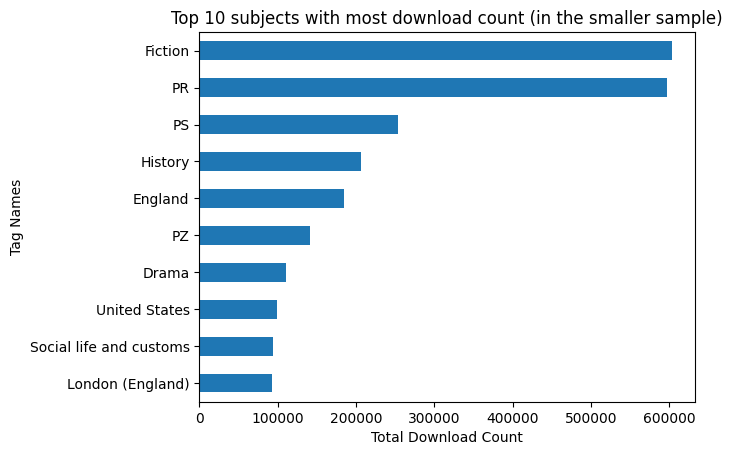

In [17]:
barh_plot = (top_10_downloads[['Tag Names', 'Total Download Count']].sort_values('Total Download Count').set_index('Tag Names')
             ).plot(kind = 'barh', xlabel = 'Total Download Count', legend = 0)
plt.title('Top 10 subjects with most download count (in the smaller sample)')
plt.show()

Ở đây xuất hiện ba chủ đề có vẻ bất thường (chúng không phải là từ có ý nghĩa) xuất hiện ở đây, đó là 'PR', 'PS' và 'PZ'. Sau khi tìm hiểu một thời gian, chúng em đã tìm ra ý nghĩa của những chủ đề này từ [Thư viện Quốc hội Hoa Kỳ](https://www.loc.gov/aba/cataloging/classification/lcco/lcco_p.pdf):  
- 'PR': **Văn học Anh**,  
- 'PS': **Văn học Mỹ**,  
- 'PZ': **Tiểu thuyết và văn học thiếu nhi**.  

Dễ dàng nhận thấy rằng 10 chủ đề có số lượt tải xuống nhiều nhất liên quan đến tiểu thuyết, lịch sử, kịch, đời sống xã hội và phong tục. Có vẻ như mọi người rất quan tâm đến những loại sách này.  
'England', 'United States' và 'London (England)' là các chủ đề ám chỉ bối cảnh chính trong câu chuyện của một số cuốn sách.  
Sự chênh lệch về số lượt tải giữa chủ đề văn học Anh ('PR') và chủ đề văn học Mỹ ('PS') là rất lớn.

### Liệu 10 chủ đề có số lượt tải xuống nhiều nhất vẫn là 10 chủ đề trên không?
Ở trên chúng em chỉ khảo sát số lượt tải xuống đối với mẫu nhỏ được chọn ngẫu nhiên từ mẫu lớn ban đầu. Liệu rằng 10 chủ đề ở phía trên có phải là 10 chủ đề có lượt tải xuống nhiều nhất đối với mẫu lớn hay không?  
Chúng em đã đặt ra một giả thuyết: 10 chủ đề trên **vẫn có thể** là các chủ đề có nhiều lượt tải nhất, miễn là:  
- Có sự tương quan mạnh giữa số lượt tải các sách và số sách liên quan tới chủ đề đó.  
- Tỷ lệ sách có chủ đề đó trong mẫu nhỏ bằng tỷ lệ sách có chủ đề đó trong mẫu lớn ban đầu.  

#### Kiểm tra sự tương quan giữa số lượt tải các sách và số sách liên quan tới chủ đề đó.
Trước khi kiểm tra tính tương quan trên, chúng em thử kiểm tra trước nếu có cột số liệu nào khác trong dữ liệu của mẫu nhỏ có tương quan mạnh với số lượt tải hay không. Cột `'reading ease score'` là cột số liệu có khả năng đó, vì cột này không bị khuyết:

In [18]:
sample[['reading ease score', 'download count']].corr()

,reading ease score,download count
reading ease score,1.000000,-0.001662
download count,-0.001662,1.000000


Vậy là không có cột nào khác trong cột dữ liệu có tính tương quan mạnh với số lượt tải.  
Tiếp theo, chúng em kiểm tra nếu có sự tương quan giữa số lượt tải các sách và số sách liên quan tới chủ đề đó:

,Book Count,Total Download Count
Book Count,1.000000,0.864271
Total Download Count,0.864271,1.000000


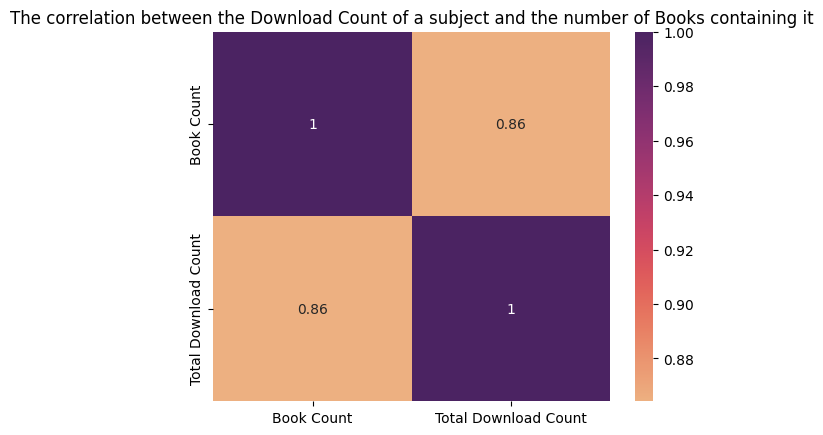

In [19]:
corr_matrix = tags_count[['Book Count', 'Total Download Count']].corr()
display(corr_matrix)
# Use heatmap to demonstrate the correlation
sns.heatmap(corr_matrix, annot = True, cmap = 'flare')
plt.title('The correlation between the Download Count of a subject and the number of Books containing it')
plt.show()

Có vẻ như số lượt tải các sách phụ thuộc nhiều vào số sách liên quan tới chủ đề đó.

#### Kiểm tra nếu tỷ lệ sách có chủ đề đó trong mẫu nhỏ bằng tỷ lệ sách có chủ đề đó trong mẫu lớn ban đầu hay không?
Với mỗi chủ đề, chúng em thực hiện kiểm định cho tỷ lệ. Dưới đây là các giả thuyết cho kiểm định:
- Giả thuyết không: tỷ lệ sách có chủ đề đó trong mẫu nhỏ bằng tỷ lệ sách có chủ đề đó trong mẫu lớn ban đầu.  
- Giả thuyết thay thế: tỷ lệ sách có chủ đề đó trong mẫu nhỏ **khác** tỷ lệ sách có chủ đề đó trong mẫu lớn ban đầu.  

Trước khi thực hiện kiểm định, chúng em đã đếm số lượng sách trong mẫu lớn ứng với mỗi chủ đề trong top 10 ở phía trên:

In [20]:
big_sample_book_count = [0] * 10
top_10_subjects = top_10_downloads['Tag Names'].to_list()

for idx in range(len(df)):
    # Set is used here to avoid repitition in the subject list
    # Count books containing the subject
    for book_subject in set(df.iloc[idx]['subjects']):
        if book_subject in top_10_subjects:
            tag_idx = top_10_subjects.index(book_subject)
            big_sample_book_count[tag_idx] += 1

big_sample_test = top_10_downloads.copy().drop(columns = 'Total Download Count').rename(columns = {
    'Book Count': 'Small Sample Book Count'})
big_sample_test['Big Sample Book Count'] = big_sample_book_count
big_sample_test

,Tag Names,Small Sample Book Count,Big Sample Book Count
1,Fiction,2433,14956
3,PR,1569,9865
44,PS,1921,11582
30,History,1125,6625
48,England,432,2709
8,PZ,1206,7249
99,Drama,120,740
281,United States,586,3535
43,Social life and customs,477,2846
4,London (England),88,532


Chúng em thực hiện các kiểm định với mức ý nghĩa 5%:

In [28]:
z_stats = []
p_values = []
alt_sign = []
significant_lvl = 0.05

for subject in top_10_subjects:
    # Calculate the proportion of a book subject (based on the number of books)
    tag_info = big_sample_test[big_sample_test['Tag Names'] == subject].iloc[0]
    population_prop = tag_info['Big Sample Book Count'] / len(df)
    # Execute the binomial test
    test_result = stats.binomtest(tag_info['Small Sample Book Count'], len(sample), population_prop, 'two-sided')
    # z-statistics
    z_stats.append((test_result.statistic - population_prop
                    ) * np.sqrt(len(sample)) / np.sqrt(population_prop * (1 - population_prop)))
    # p-value
    p_values.append(test_result.pvalue)
    # Alternative Sign (True/False)
    alt_sign.append(p_values[-1] <= significant_lvl)

Dưới đây là kết quả thực hiện các kiểm định:

In [29]:
result_df = pd.DataFrame({
    'Tag Names': top_10_subjects,
    'z-statistics': z_stats,
    'p-value': p_values,
    'Alternative': alt_sign
})

print(f'Significance Level: {round(significant_lvl * 100, 2)}%.')
print(f'''Null Hypothesis (for each subject in the top 10):
The number of books in the smaller sample is proportional to the number of books in the big sample.''')
print(f'''Alternative Hypothesis (for each subject in the top 10):
The number of books in the smaller sample is not proportional to the number of books in the big sample.''')
result_df

Significance Level: 5.0%.
Null Hypothesis (for each subject in the top 10):
The number of books in the smaller sample is proportional to the number of books in the big sample.
Alternative Hypothesis (for each subject in the top 10):
The number of books in the smaller sample is not proportional to the number of books in the big sample.


,Tag Names,z-statistics,p-value,Alternative
0,Fiction,-1.206405,0.232935,False
1,PR,-1.896410,0.058495,False
2,PS,-0.087915,0.939302,False
3,History,0.773161,0.433638,False
4,England,-0.874415,0.398519,False
5,PZ,0.046323,0.963228,False
6,Drama,-0.268451,0.855891,False
7,United States,-0.058492,0.983030,False
8,Social life and customs,0.193615,0.832091,False
9,London (England),-0.042419,1.000000,False


Dựa theo kết quả trên, chúng em có cơ sở để khẳng định rằng: Với mỗi chủ đề trong 10 chủ đề có lượt tải nhiều nhất, tỷ lệ sách có chủ đề đó trong mẫu nhỏ bằng tỷ lệ sách có chủ đề đó trong mẫu lớn ban đầu.  
Do đó, 10 chủ đề ở phía trên **vẫn có thể** là 10 chủ đề có lượt tải xuống nhiều nhất đối với mẫu lớn.  
Hãy xem lại 10 chủ đề có lượt tải xuống nhiều nhất dưới đây:

In [24]:
top_10_downloads.reset_index(drop = 1)

,Tag Names,Book Count,Total Download Count
0,Fiction,2433,602919
1,PR,1569,597535
2,PS,1921,253140
3,History,1125,206355
4,England,432,185070
5,PZ,1206,141824
6,Drama,120,111210
7,United States,586,99012
8,Social life and customs,477,93627
9,London (England),88,92827
